<a href="https://colab.research.google.com/github/gkrry2723/ML11/blob/master/ML11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.tag import pos_tag
from collections import Counter
import collections
nltk.download('averaged_perceptron_tagger')

review_data = load_files(r"/gdrive/My Drive/ML_assignment/movie_review")
#   X: 문서, y: lable(1: positive, 0: negative) 
X, y = review_data.data, review_data.target
documents = []
pluss=[]

stemmer = WordNetLemmatizer()
stemmer2 = nltk.stem.SnowballStemmer('english')
for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    # worst_num=document.count("worst")
    # boring_num=document.count("boring")

    #tags_en = nltk.pos_tag(document)
    #adj_list = [t[0] for t in tags_en if t[1] == "JJ" or t[1] == "JJR" or t[1]=="JJS" or t[1]=="RBR"]
    
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)
    #plus=""
    # for i in range(0,worst_num):
    #   plus= plus+" worst"
    # for i in range(0,boring_num):
    #   plus= plus+" boring"
    # pluss.append(plus)

vectorizer = CountVectorizer(min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
#vectorizer = CountVectorizer(min_df=5,max_df=0.8, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
list_x=X.tolist()
negative=[]
positive=[]
for i in range(0,2002):
  if y[i]==0:
    negative.append(list_x[i])
  else:
    positive.append(list_x[i])
negative=np.array(negative)
positive=np.array(positive)
total_sum=X.sum(axis=0)
neg_sum=negative.sum(axis=0)
pos_sum=positive.sum(axis=0)

neg_ratio=neg_sum/total_sum
pos_ratio=pos_sum/total_sum

good=[]
for i in range(0,len(pos_sum)):
  if neg_ratio[i]>pos_ratio[i]*3:
    good.append(i)
  elif pos_ratio[i]>neg_ratio[i]*3:
    good.append(i)
print("good의 길이:   " , len(good))
new=np.ones((1,2002), dtype=float)
for i in range(0,len(good)):
  temp=X[:,good[i]]
  temp=temp[np.newaxis]
  new=np.vstack((new,temp))
new=np.transpose(new)
new=new[:,1:]
# vectorizer = CountVectorizer(max_features=2, min_df=0, stop_words=stopwords.words('english'))
# Xp = vectorizer.fit_transform(pluss).toarray()

# tfidfconverter = TfidfTransformer()
# X = tfidfconverter.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(new, y, test_size=0.3, shuffle=False)

good의 길이:    935


In [6]:
import math
train_x=X_train
test_x=X_test
train_l=y_train
test_l=y_test

train_x=np.transpose(train_x)
test_x=np.transpose(test_x)

# 1. 세타 값 initialization
mu, sigma = 0, 0.1
u=np.random.normal(mu,sigma,(300,len(train_x)+1))
v=np.random.normal(mu,sigma,(60,301))
w=np.random.normal(mu,sigma,(12,61))
t=np.random.normal(mu,sigma,(13))[np.newaxis]

#bias 값 추가
temp1=np.ones((len(train_x[0])), dtype=float)
temp2=np.ones(len((test_x[0])), dtype=float)

train_x=np.insert(train_x,0,temp1,axis=0)
test_x=np.insert(test_x,0,temp2,axis=0)

#plot위한 list
J_train=[]
accurate_train=[]
steps=[]

J_test=[]
accurate_test=[]

#sigmoid 함수 이후 값
y_s = np.zeros((301, len(train_x[0])), dtype=float)
z_s = np.zeros((61,len(train_x[0])), dtype=float)
k_s = np.zeros((13,len(train_x[0])), dtype=float)
h_s = np.zeros((1, len(train_x[0])), dtype=float)

y_st = np.zeros((301, len(test_x[0])), dtype=float)
z_st = np.zeros((61,len(test_x[0])), dtype=float)
k_st = np.zeros((13,len(test_x[0])), dtype=float)
h_st = (np.zeros((len(test_x[0])), dtype=float))[np.newaxis]

#label위한 diagonal 행렬
#l=np.identity(10)

#bias 값 추가(sigmoid layer에만)
for i in range(0,len(train_x[0])):
  if(i<len(test_x[0])):
    y_st[0][i]=1
    z_st[0][i]=1
  y_s[0][i]=1
  z_s[0][i]=1
  
 
for c in range(0,10000):
  steps.append(c)

  # 3. J 구하기
  #3-1 y랑 sigmoid y
  y=np.dot(u,train_x)
  yt=np.dot(u,test_x)
  for a in range(1,301):
    for b in range(0,len(train_x[0])):
      if(b<len(test_x[0])):
        y_st[a][b]=1/(1+math.exp(-yt[a-1][b]))
      y_s[a][b]=1/(1+math.exp(-y[a-1][b]))

  #3-2 z 랑 sigmoid z
  z=np.dot(v,y_s)
  zt=np.dot(v,y_st)
  for a in range(1,61):
    for b in range(0,len(train_x[0])):
      if(b<len(test_x[0])):
        z_st[a][b]=1/(1+math.exp(-zt[a-1][b]))
      z_s[a][b]=1/(1+math.exp(-z[a-1][b]))
  
  #3-3 k 랑 sigmoid k
  k=np.dot(w,z_s)
  kt=np.dot(w,z_st)
  for a in range(1,13):
    for b in range(0,len(train_x[0])):
      if(b<len(test_x[0])):
        k_st[a][b]=1/(1+math.exp(-kt[a-1][b]))
      k_s[a][b]=1/(1+math.exp(-k[a-1][b]))

  #3-4 H랑 sigmoid h
  h=np.dot(t,k_s)
  ht=np.dot(t,k_st)
  for b in range(0,len(train_x[0])):
    if(b<len(test_x[0])):
      h_st[0][b]=1/(1+math.exp(-ht[0][b]))
    h_s[0][b]=1/(1+math.exp(-h[0][b]))
  #print(h,"::::::::::::::::",ht)
  #5. gradient descent 하기, J 구하기, accurate 세기
  J_sum=0
  theta_sum=0
  p=0.5
  lambdaa=100

  h_s_t=np.transpose(h_s)
  k_s_t=np.transpose(k_s[1:,:])
  z_s_t=np.transpose(z_s[1:,:])
  y_s_t=np.transpose(y_s[1:,:])
  x_s_t=np.transpose(train_x[1:,:])

  t_t=t[:,1:]
  w_t=w[:,1:]
  v_t=v[:,1:]
  u_t=u[:,1:]
  
  one_k=np.transpose(np.ones((12), dtype=float))
  one_z=np.transpose(np.ones((60), dtype=float))
  one_y=np.transpose(np.ones((300), dtype=float))

  delta5=np.transpose((np.zeros((12), dtype=float)))
  delta4=np.zeros((60,12), dtype=float)
  delta3=np.zeros((300,60), dtype=float)
  delta2=np.zeros((len(train_x)-1,300), dtype=float)

  Jt_sum=0

  y_pred_test=np.empty(len(test_x[0]), dtype=int)
  y_pred_train=np.empty(len(train_x[0]), dtype=int)
  count_test=0
  count=0

  for i in range(0,len(train_x[0])):
    if(h_s[0][i]>=0.5):
      result=1
      y_pred_train[i]=1 
    else:
      result=0
      y_pred_train[i]=0
    if(result==train_l[i]):
      count=count+1
    

    lable=train_l[i]
    temp5=h_s_t[i]-train_l[i]
    temp4=np.multiply( np.dot( np.transpose( t_t ) , temp5 ) ,np.transpose(np.multiply(k_s_t[i] , one_k - k_s_t[i])))
    temp3=np.multiply( np.dot( np.transpose(w_t) , temp4) , np.transpose(np.multiply(z_s_t[i] , one_z - z_s_t[i])))
    temp2=np.multiply( np.dot( np.transpose( v_t ) , temp3) , np.transpose(np.multiply(y_s_t[i] , one_y - y_s_t[i])))

    delta5=delta5+ np.dot( np.transpose(k_s_t[i][np.newaxis]),temp5[np.newaxis])
    delta4=delta4 + np.dot( np.transpose(z_s_t[i][np.newaxis]), temp4[np.newaxis])
    delta3=delta3+ np.dot( np.transpose(y_s_t[i][np.newaxis]), temp3[np.newaxis] )
    delta2=delta2+ np.dot(np.transpose(x_s_t[i][np.newaxis]), temp2[np.newaxis])

    J_sum=J_sum+(-train_l[i]*math.log(h_s[0][i])-(1-train_l[i])*math.log(1-h_s[0][i]))

    #######################test
    if i<len(test_x[0]):
      if(h_st[0][i]>=0.5):
        y_pred_test[i]=1
      else:
        y_pred_test[i]=0
      if(y_pred_test[i]==test_l[i]):
        count_test=count_test+1

      
      Jt_sum=Jt_sum+(-test_l[i]*math.log(h_st[0][i])-(1-test_l[i])*math.log(1-h_st[0][i]))
    ###########################

  u2=np.multiply(u_t,u_t)
  v2=np.multiply(v_t,v_t)
  w2=np.multiply(w_t,w_t)
  t2=np.multiply(t_t,t_t)
  theta_sum=np.sum(u2)+np.sum(v2)+np.sum(w2)+np.sum(t2)

  accuracy=count/len(train_x[0])
  accurate_train.append(accuracy)

  delta5=delta5/len(train_x[0])+lambdaa*np.transpose(t_t)/(12+12*60+60*300+300*(len(train_x)-1))
  delta4=delta4/len(train_x[0])+lambdaa*np.transpose(w_t)/(12+12*60+60*300+300*(len(train_x)-1))
  delta3=delta3/len(train_x[0])+lambdaa*np.transpose(v_t)/(12+12*60+60*300+300*(len(train_x)-1))
  delta2=delta2/len(train_x[0])+lambdaa*np.transpose(u_t)/(12+12*60+60*300+300*(len(train_x)-1))

  J_sum=J_sum/len(train_x[0])+lambdaa*theta_sum/(2*(12+12*60+60*300+300*(len(train_x)-1)))
  J_train.append(J_sum)

  ####################test
  accuracy_test=count_test/len(test_x[0])
  accurate_test.append(accuracy_test)

  Jt_sum=Jt_sum/len(test_x[0])+lambdaa*theta_sum/(2*(12+12*60+60*300+300*(len(train_x)-1)))
  J_test.append(Jt_sum)
  ######################

  for a in range(0,300):
    for b in range(1,len(train_x)):
      if a<1 and b<13:
        t[a][b]=t[a][b]-p*(np.transpose(delta5)[a][b-1])
      if a<12 and b<61:
        w[a][b]=w[a][b]-p*(np.transpose(delta4)[a][b-1])
      if a<60 and b<301:
        v[a][b]=v[a][b]-p*np.transpose(delta3)[a][b-1]
      u[a][b]=u[a][b]-p*np.transpose(delta2)[a][b-1]

  print(c,"train:::acccuracy  ",accuracy,"   J   ",J_sum,"::::: test accuracy",accuracy_test,"   J   ",Jt_sum)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test, y_pred_test))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5025 train:::acccuracy   0.9978586723768736    J    0.15665201996199868 ::::: test accuracy 0.8785357737104825    J    0.6297835269517812
5026 train:::acccuracy   0.9978586723768736    J    0.15661137326322966 ::::: test accuracy 0.8785357737104825    J    0.6298784344474662
5027 train:::acccuracy   0.9978586723768736    J    0.15657076483245697 ::::: test accuracy 0.8785357737104825    J    0.6299729905723228
5028 train:::acccuracy   0.9978586723768736    J    0.15653019446564234 ::::: test accuracy 0.8785357737104825    J    0.6300671970344166
5029 train:::acccuracy   0.9978586723768736    J    0.15648966196093128 ::::: test accuracy 0.8785357737104825    J    0.6301610555278303
5030 train:::acccuracy   0.9978586723768736    J    0.15644916711862203 ::::: test accuracy 0.8785357737104825    J    0.6302545677328546
5031 train:::acccuracy   0.9978586723768736    J    0.15640870974113497 ::::: test accuracy 0.8785357737104825    J    0.630347735316148

  ***************정답 1page//20184754 김현주***************  

 1. Plot the loss curve 


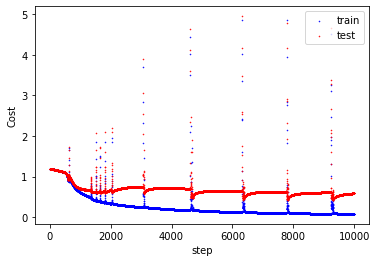

 2.  Plot the accuracy curve 


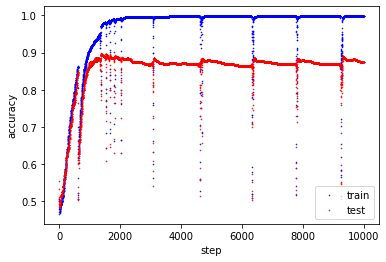

 3.  Plot the quantitative results 
 [[699   0]
 [  3 699]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       699
           1       1.00      1.00      1.00       702

    accuracy                           1.00      1401
   macro avg       1.00      1.00      1.00      1401
weighted avg       1.00      1.00      1.00      1401

0.9978586723768736 
 [[262  40]
 [ 36 263]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       302
           1       0.87      0.88      0.87       299

    accuracy                           0.87       601
   macro avg       0.87      0.87      0.87       601
weighted avg       0.87      0.87      0.87       601

0.8735440931780366 


In [7]:
import matplotlib.pyplot as plt
# 답 쓰는 곳
print("\033[1m","\033[31m","***************정답 1page//20184754 김현주***************","\033[0m","\n")
print("\033[1m","1. Plot the loss curve","\033[0m")
f1 = plt.figure(1) 
plt.scatter(steps,J_train,c="blue",s=0.3,label='train')
plt.scatter(steps,J_test,c="red",s=0.3,label='test')

plt.xlabel('step')
plt.ylabel('Cost')

plt.legend(loc='upper right')

plt.show() 

print("\033[1m","2.  Plot the accuracy curve","\033[0m")
f2 = plt.figure(2)
plt.scatter(steps,accurate_train,c="blue",s=0.3,label='train')
plt.scatter(steps,accurate_test,c="red",s=0.3,label='test')

plt.xlabel('step')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

plt.show() 
print("\033[1m","3.  Plot the quantitative results","\033[0m")
print("\033[31m",confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train),"\033[0m")

print("\033[34m",confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test, y_pred_test),"\033[0m")

